# 머신러닝 - 붓꽃 품종 분류
* 붓꽃 품종으로 Iris Versicolor, Iris Setosa, Iris Virginica 등  
* 관련 이미지  
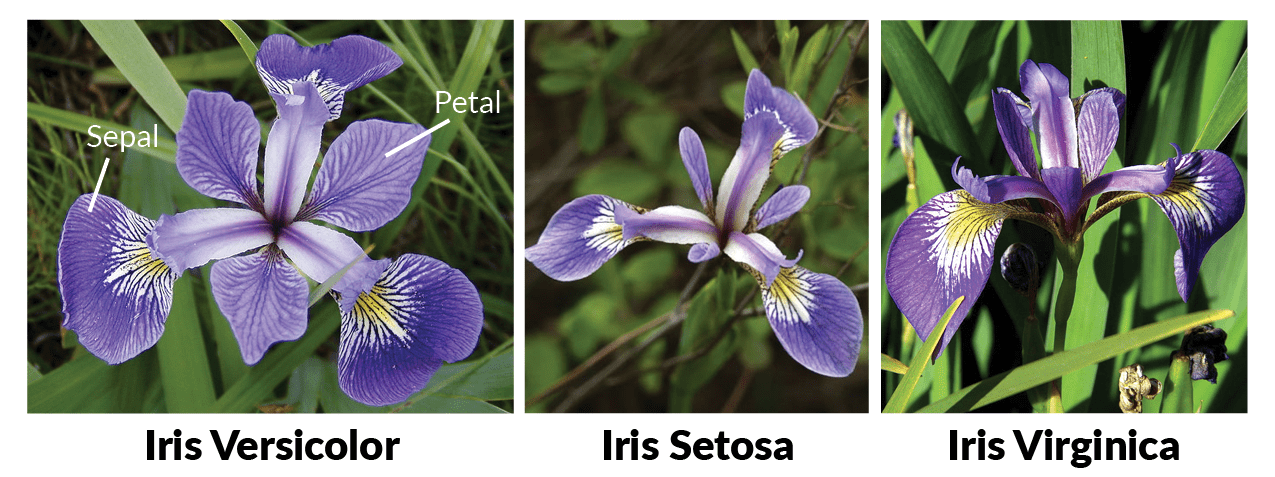   
* 붓꽃 품종 분류 방법 : Petal(꽃잎), Sepal(꽃받침)으로 이루어져 있는데, 품종은 꽃잎, 꽃받침의 길이와 폭으로 구분
* 구분자: petal length(꽃잎길이), petal width(꽃잎폭), sepal length(꽃받침길이), sepal width(꽃받침폭)  
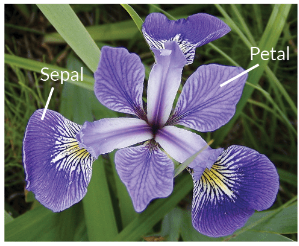<br>  

* 분류 과정  
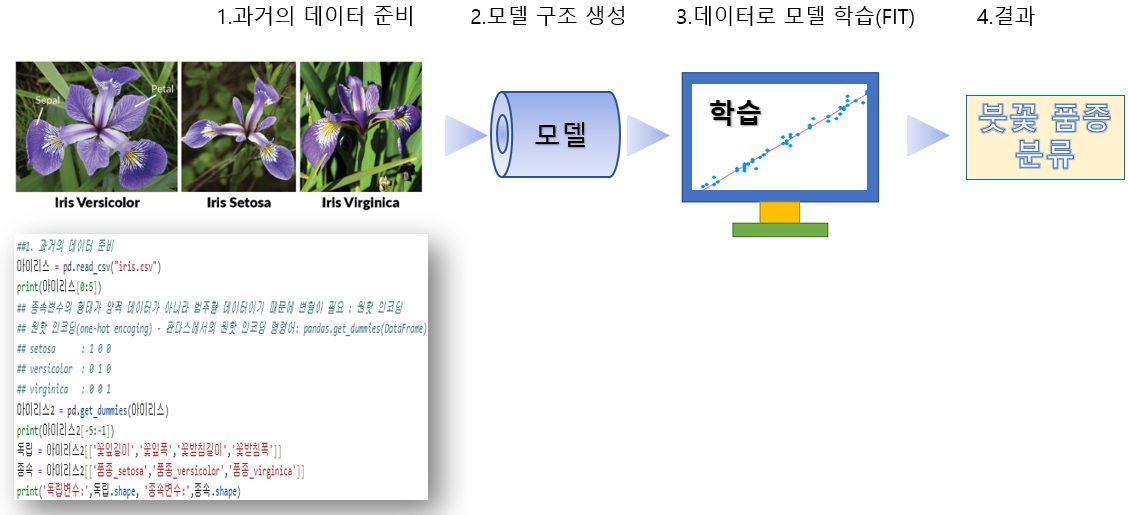    

### 필요한 실습 자료 
> 아이리스 데이터( [다운로드](https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv)  )(URL) https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/iris.csv  
> ■사용방법  
> <font color=blue>아이리스 = pd.read_csv(URL)</font>  
> <font color=blue>독립 = 아이리스[['꽃잎길이','꽃잎폭','꽃받침길이','꽃받침폭']]</font>  
> <font color=blue>종속 = 아이리스[['품종']]</font>

In [ ]:
## 관련 라이브러리 추가
import tensorflow as tf      # 머신러닝: tensorflow
import pandas as pd          # 데이터: Pandas                  

In [ ]:
##1. 과거의 데이터 준비
아이리스 = pd.read_csv("iris.csv")  
print(아이리스[0:5])
## 종속변수의 형태가 양적 데이터가 아니라 범주형 데이터이기 때문에 변형이 필요 : 원핫 인코딩
## 원핫 인코딩(one-hot encoging) - 판다스에서의 원핫 인코딩 명령어: pandas.get_dummies(DataFrame)   
## setosa      : 1 0 0
## versicolor  : 0 1 0
## virginica   : 0 0 1 
## 그외에도 케라스에서는 원핫 인코딩 변환 함수 지원: keras.utils.to_categorical(y, num_classes, ...)
아이리스2 = pd.get_dummies(아이리스)
print(아이리스2[-5:-1])
독립 = 아이리스2[['꽃잎길이','꽃잎폭','꽃받침길이','꽃받침폭']]  
종속 = 아이리스2[['품종_setosa','품종_versicolor','품종_virginica']]
print('독립변수:',독립.shape, '종속변수:',종속.shape)

In [ ]:
##2. 모델 구조 생성
X = tf.keras.layers.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation='softmax')(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])          
# 손실함수(loss): 분류형(categorical_crossentropy, binary_crossentropy), 회귀문제(mse)
# 평가지표(metrics): 분류형( 정확도(accuracy), precision, recall, f1-score 등 리스트타입으로 제공 , 회귀문제(mse)

In [ ]:
##3. 데이터로 모델 학습(fit)
model.fit(독립, 종속, epochs=2000, verbose=False)   # verbose=False 옵션은 내용보기 안함    
model.fit(독립, 종속, epochs=10)                    # default는 내용보기 

In [ ]:
##4. 모델을 이용하여 예측
##테스트 데이터는 독립  중 일부 
print("붓꽃 분류:\n",model.predict(독립[-5:]))      

In [ ]:
종속[-5:]

In [ ]:
## 정보확인 : 가중치
print(model.get_weights())                                                     

In [ ]:
weight=[[ 1.6105814 ,  1.1304448 , -0.4539784 ],
       [ 4.27365   ,  0.28127617, -1.9794647 ],
       [-5.20195   , -0.8232248 ,  1.5348915 ],
       [-6.830734  , -2.22431   ,  3.0656922 ]]

In [ ]:
import numpy as np
np.array(weight).T

# 다양한 지도학습 머신러닝 살펴보기

In [ ]:
## 1. 데이터 수집
from sklearn.datasets import load_iris
iris = load_iris()
print('처음 데이터는 정제되지 않는 Dictory Type 정보')
print('붓꽃 데이터의 속성 이름',iris.feature_names)
print('붓꽃 데이터의 레이블 종류 보기', iris.target_names)

In [ ]:
iris.DESCR

In [ ]:
iris.keys()

In [ ]:
## 2. 데이터 전처리 
## 이러한 데이터를 Pandas DataFrame 형태로 재구성
아이리스 = pd.DataFrame(data=iris.data,columns=['꽃받침길이','꽃받침폭','꽃잎길이','꽃잎폭'])
아이리스['품종'] = iris['target']

In [ ]:
아이리스.head()

In [ ]:
아이리스.describe()

In [ ]:
# Visual Python: Visualization > Chart Style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(8, 8))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 11
rcParams['axes.unicode_minus'] = False

In [ ]:
아이리스[['꽃받침길이','품종']].boxplot(by='품종')

In [ ]:
## 2-2 train_test_split
import sklearn
from sklearn.model_selection import train_test_split

독립 = 아이리스[아이리스.columns[0:4]]
종속 = 아이리스['품종']
X_train, X_test, y_train, y_test = train_test_split(독립, 종속, random_state = 42, test_size = 0.2)

In [ ]:
## 2-3 전처리
## 각 feature 값의 평균을 0, 표준편차를 1로 간주하여 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss_train = ss.fit_transform(X_train)
ss_test = ss.fit_transform(X_test)

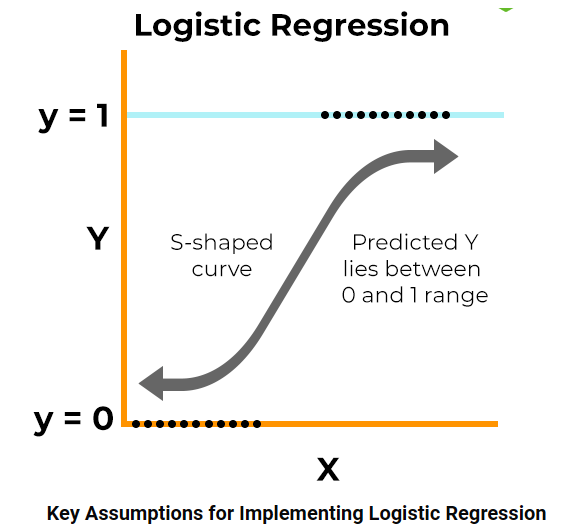

In [ ]:
## 3. 모델링(로지스틱 회귀분석) + 학습(fit)
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(ss_train, y_train)

In [ ]:
## 4. 예측 
pred_y_train = logit.predict(ss_train)
pred_y_test = logit.predict(ss_test)

In [ ]:
## 5. 평가
print("model score train: ", logit.score(ss_train,y_train))
print("model score test: ", logit.score(ss_test,y_test))

In [ ]:
## 모델이 예측한 결과와 실제 값을 비교하여 만들어지는 행렬: confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_y_test)

In [ ]:
print(y_test)
print(pred_y_test)

# 그외의 다양한 모델
1. 의사결정트리 : from sklearn.tree import DecisionTreeClassifier
2. 랜덤포레스트 : from sklearn.ensemble import RandomForestClassifier
3. 서포트벡터머신(SVC): from sklearn.svm import SVC
4. 최근접이웃법(K-Neighbors, KNN): from sklearn.neighbors import KNeighborsClassifier 